# [Lab Session 4](deconvolution.ipynb)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.restoration import wiener
from scipy.signal import convolve2d as conv
from scipy.stats import multivariate_normal as multi_normal

np.random.seed(0)

Load the image.

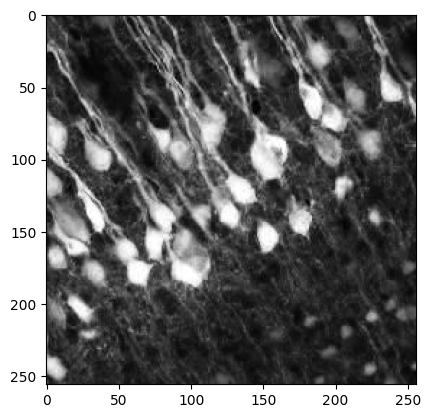

In [3]:
img = plt.imread('data/cells.png')[128:384, 128:384]
plt.imshow(img, 'gray')

**[Task 1.]()** Apply the following PSF to the image and then display it.

In [4]:
psf_size = 10
psf = np.ones((psf_size, psf_size)) / psf_size ** 2

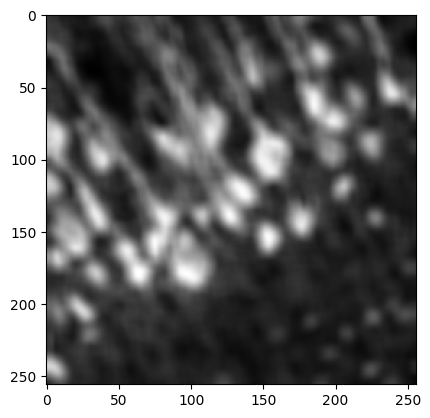

In [5]:
convolution = conv(img, psf, mode='same', boundary='symm')
plt.imshow(convolution, cmap='gray')

**[Task 2.]()** Have a look at the Gaussian PSF which is not uniformly distributed. Apply it to the image.

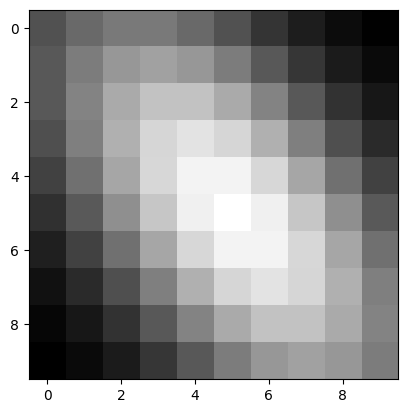

In [6]:
def create_psf(size):
    factor = size * 1.8
    x, y = np.mgrid[0:size:1, 0:size:1]
    pos = np.empty(x.shape + (2,))
    pos[:, :, 0] = x
    pos[:, :, 1] = y
    rv = multi_normal([int(size / 2), (int(size / 2))], [[factor * 1., factor * 1.2], [factor * .5, factor * .7]])
    return rv.pdf(pos)

plt.imshow(create_psf(psf_size), 'gray');

Apply the second psf to the image:

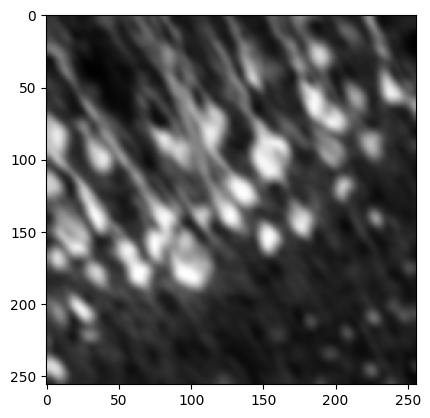

In [7]:
gauss_convolution = conv(img, create_psf(psf_size), mode='same', boundary='symm')
plt.imshow(gauss_convolution, cmap='gray');

**[Task 3.]()** Implement a reusable function that performs the Richardson-Lucy deconvolution.

In [8]:
def richardson_lucy_deconvolution(image, psf, n_iterations):
    img_deconv = np.full(image.shape, 0.5) #=h

    P = psf
    g = image
    P_ = np.flip(psf)
    #* = conv(g, P, mode='same', boundary='symm')
    for _ in range(n_iterations + 1): 
        convolution_ = conv(img_deconv, P, mode='same', boundary='symm')
        correction_factor = conv(g/(convolution_ +1e-8), P_, mode='same', boundary='symm')
        img_deconv *= correction_factor

    img_deconv = img_deconv.clip(0,1)
    return img_deconv

**[Task 4.]()** Apply the Richardson-Lucy deconvolution to the blurred image.

In [9]:
richardlucy = richardson_lucy_deconvolution(convolution, psf, 150)
# plt.imshow(richardlucy, cmap='gray');
# plt.title('restored image')
# plt.show()
# plt.clf()

# plt.imshow(convolution, cmap='gray');
# plt.title('picture after convolution')
# plt.show()
# plt.clf()

# plt.imshow(img, cmap='gray');
# plt.title('original image')
# plt.show()

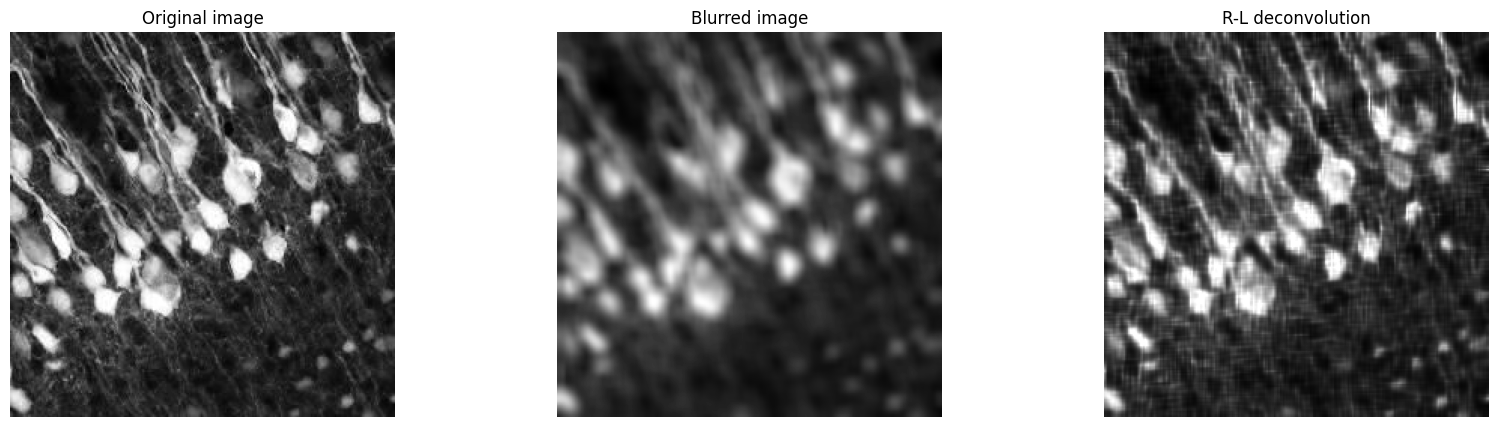

In [10]:
plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)
plt.axis('off')
plt.imshow(img, 'gray')
plt.title('Original image')
plt.subplot(1, 3, 2)
plt.axis('off')
plt.imshow(convolution, 'gray')
plt.title('Blurred image')
plt.subplot(1, 3, 3)
plt.axis('off')
plt.imshow(richardlucy, 'gray')
plt.title('R-L deconvolution')
plt.show()

**[Task 5.]()** Add noise to the image, use the R-L deconvolution again.

In [17]:
noise = (np.random.normal(loc=0,size=img.shape))
reduce_factor = 19
noise = noise / reduce_factor

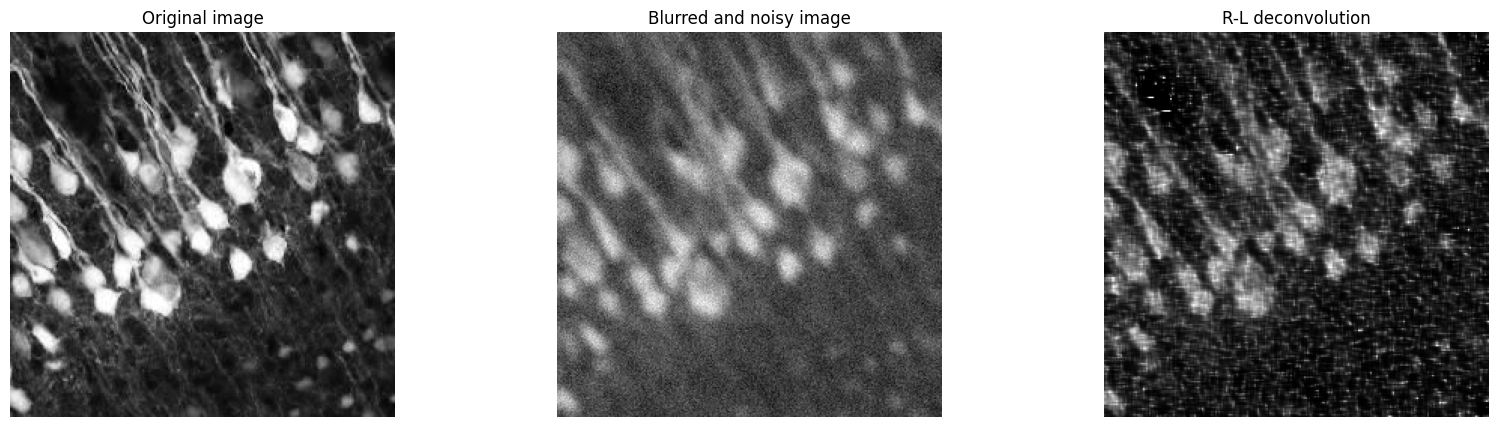

In [20]:
noisy_image = gauss_convolution + noise
noisy_image.clip(0,1)
r_l = richardson_lucy_deconvolution(noisy_image, create_psf(psf_size), 50)
plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)
plt.axis('off')
plt.imshow(img, 'gray')
plt.title('Original image')
plt.subplot(1, 3, 2)
plt.axis('off')
plt.imshow(noisy_image, 'gray')
plt.title('Blurred and noisy image')
plt.subplot(1, 3, 3)
plt.axis('off')
plt.imshow(r_l, 'gray')
plt.title('R-L deconvolution')
plt.show()

**[Task 6.]()** Compare your R-L implementation to a wiener deconvolution.

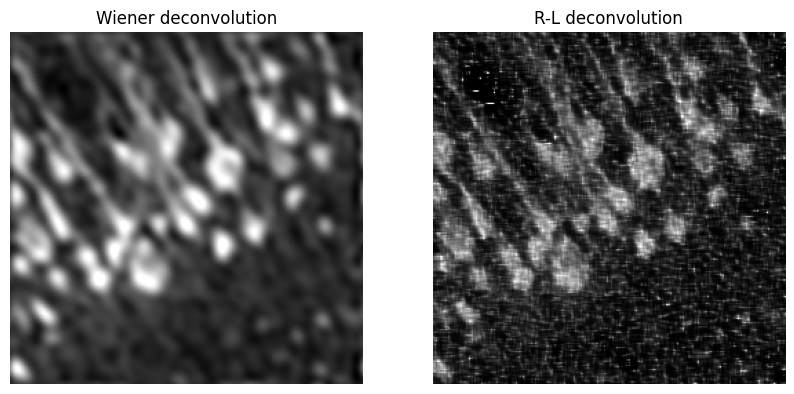

In [27]:
Wiener= wiener(noisy_image, create_psf(psf_size), balance=2, clip=True)
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.axis('off')
plt.imshow(Wiener, 'gray');
plt.title('Wiener deconvolution')

plt.subplot(1, 2, 2)
plt.axis('off')
plt.imshow(r_l, 'gray')
plt.title('R-L deconvolution');

**[Task 7.]()** Repeat Tasks 4–6 using a smaller value for the size of the PSF.

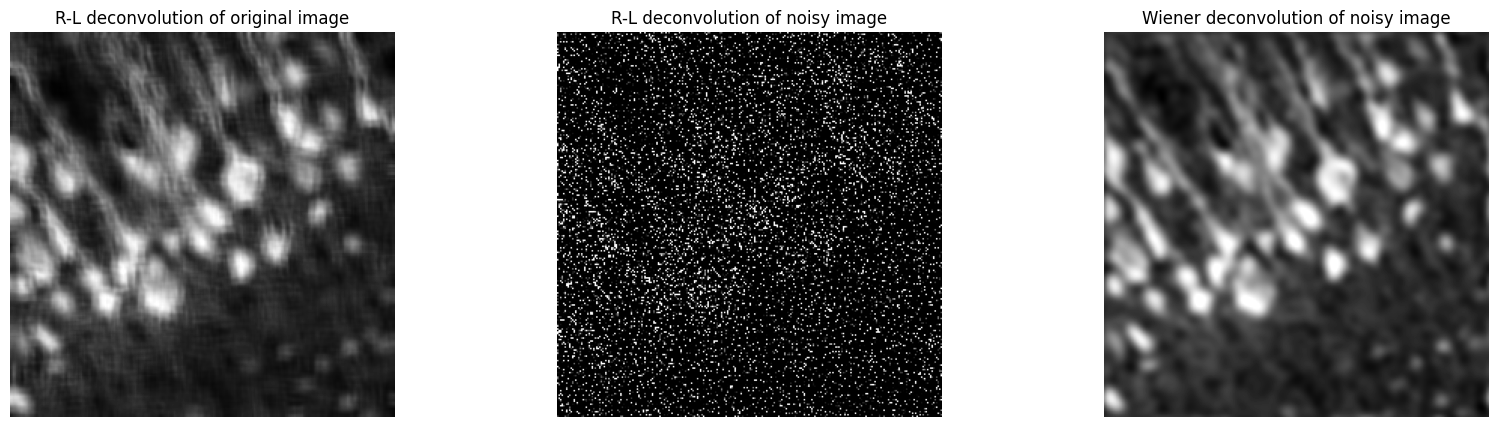

In [30]:
smaller_psf_size = 5 #smaller value for psf size
psf_small = np.ones((smaller_psf_size, smaller_psf_size)) / smaller_psf_size ** 2

#task 4
richard_lucy = richardson_lucy_deconvolution(convolution, psf_small, 150)
#task 5
gauss_convolution2 = conv(img, create_psf(smaller_psf_size), mode='same', boundary='symm')
noisy_image2 = gauss_convolution2 + noise
richard_lucy_noisy = richardson_lucy_deconvolution(noisy_image2, psf_small, 150)

#task 6
noisy_image2.clip(0,1)
Wiener= wiener(noisy_image2, create_psf(smaller_psf_size), balance=2, clip=True)
#display the results
plt.figure(figsize=(20,5))
#plt.title('images after using smaller psf size')
plt.subplot(1, 3, 1)
plt.axis('off')
plt.imshow(richard_lucy, 'gray')
plt.title('R-L deconvolution of original image')
plt.subplot(1, 3, 2)
plt.axis('off')
plt.imshow(richard_lucy_noisy, 'gray')
plt.title('R-L deconvolution of noisy image')
plt.subplot(1, 3, 3)
plt.axis('off')
plt.imshow(Wiener, 'gray')
plt.title('Wiener deconvolution of noisy image')
plt.show()



**[Task 8.]()** Use a wrong PSF to restore the image

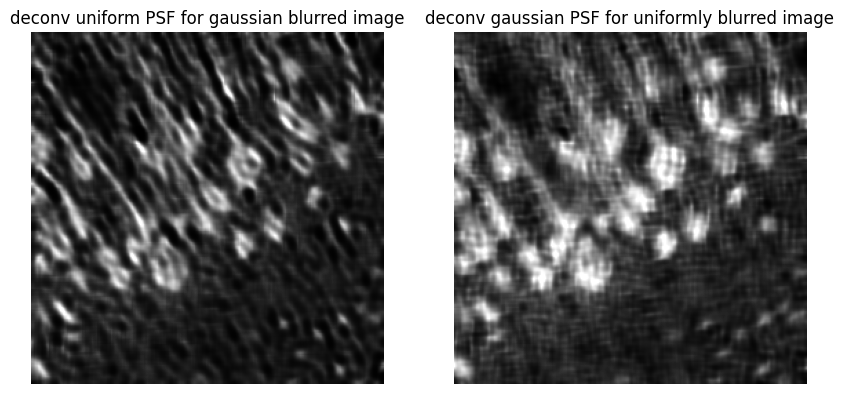

In [31]:
#do a r-l deconvolution using uniform PSF for gaussian blurred image
#gauss_convolution = gaussian blurred image
r_and_l = richardson_lucy_deconvolution(gauss_convolution, psf, 150)


#do a r-l deconvolution using gaussian PSF for uniformly blurred image
r_and_l_again = richardson_lucy_deconvolution(convolution, create_psf(psf_size), 150)
#convolution = uniformly blurred image

#display the wrong images
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.axis('off')
plt.imshow(r_and_l, 'gray');
plt.title('deconv uniform PSF for gaussian blurred image')

plt.subplot(1, 2, 2)
plt.axis('off')
plt.imshow(r_and_l_again, 'gray')
plt.title('deconv gaussian PSF for uniformly blurred image');